## Set-up

In [13]:
import os
import itertools
import pandas as pd
import matplotlib.pyplot as plt

languages = ["tr", "ar", "zh", "en", "eo", "sr", "uk", "bg", "ru", "vi", "pl", "sk", "sl", "cs"]
models = ["gemma-2b", "gemma-7b", "aya23", "qwen1.5-7b", "olmo-7b", "gemma-2-9b"]

## Genesis

In [ ]:
from datasets import load_dataset

data = {}
for i in range(0, len(languages), 2):
    l1, l2 = languages[i], languages[i+1]
    print(l1, l2)
    try:
        dataset = load_dataset("bible_para", lang1=l1, lang2=l2, trust_remote_code=True)
    except:
        l1, l2 = l2, l1
        dataset = load_dataset("bible_para", lang1=l1, lang2=l2, trust_remote_code=True)
        
    pairs = dataset["train"]["translation"]
    data[l1] = [i[l1] for i in pairs]
    data[l2] = [i[l2] for i in pairs]

os.makedirs("genesis", exist_ok=True)

for lang in languages:
    with open(f"genesis/{lang}.txt", "w") as f:
        f.write("\n".join(data[lang][:1533]))

for lang in languages:
    with open(f"genesis/{lang}-50.txt", "w") as f:
        f.write("\n".join(data[lang][:50]))

In [8]:
for language in languages:
    with open(f"genesis/{language}.txt", "r") as f:
        text = f.read()

    print(language, len(text), len(text.split()), round(len(text) / len(text.split()), 2))

tr 157859 21170 7.46
ar 113332 21270 5.33
zh 83221 33522 2.48
en 187817 35902 5.23
eo 187744 34635 5.42
sr 153740 29290 5.25
uk 142102 25239 5.63
bg 152069 27764 5.48
ru 159998 28168 5.68
vi 186482 42023 4.44
pl 179523 30245 5.94
sk 173591 31163 5.57
sl 179063 32750 5.47
cs 168022 29976 5.61


In [9]:
def file_size_ratio(path_a, path_b):
    try:
        size_a = os.path.getsize(path_a)
        
        size_b = os.path.getsize(path_b)

        ratio = size_a / size_b

        return ratio
    
    except FileNotFoundError as e:
        print(f"Error: {e}")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [ ]:
# df200 = pd.DataFrame({"language": {}, "model": {}, "CR": {}})
# for language, model in itertools.product(languages, models):
#     original_path = f"genesis/{language}-sample.txt"
#     compressed_path = f"{model}-genesis/{language}-sample.llzip"
#     CR = file_size_ratio(original_path, compressed_path)


#     df200.loc[len(df200)] = {"language": language, "model": model, "CR": CR}

In [10]:
df50 = pd.DataFrame({"language": {}, "model": {}, "CR": {}})

for language, model in itertools.product(languages, models):
    original_path = f"genesis/{language}-50.txt"
    compressed_path = f"{model}-genesis/{language}-50.llzip"
    CR = file_size_ratio(original_path, compressed_path)


    df50.loc[len(df50)] = {"language": language, "model": model, "CR": CR}

Error: [Errno 2] No such file or directory: 'gemma-2b-genesis/pl-50.llzip'
Error: [Errno 2] No such file or directory: 'qwen1.5-7b-genesis/pl-50.llzip'
Error: [Errno 2] No such file or directory: 'olmo-7b-genesis/pl-50.llzip'
Error: [Errno 2] No such file or directory: 'gemma-2-9b-genesis/pl-50.llzip'
Error: [Errno 2] No such file or directory: 'gemma-2b-genesis/sk-50.llzip'
Error: [Errno 2] No such file or directory: 'qwen1.5-7b-genesis/sk-50.llzip'
Error: [Errno 2] No such file or directory: 'olmo-7b-genesis/sk-50.llzip'
Error: [Errno 2] No such file or directory: 'gemma-2-9b-genesis/sk-50.llzip'
Error: [Errno 2] No such file or directory: 'gemma-2b-genesis/sl-50.llzip'
Error: [Errno 2] No such file or directory: 'qwen1.5-7b-genesis/sl-50.llzip'
Error: [Errno 2] No such file or directory: 'olmo-7b-genesis/sl-50.llzip'
Error: [Errno 2] No such file or directory: 'gemma-2-9b-genesis/sl-50.llzip'
Error: [Errno 2] No such file or directory: 'gemma-2b-genesis/cs-50.llzip'
Error: [Errno 2]

/tmp/ipykernel_8009/2452349847.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df50.loc[len(df50)] = {"language": language, "model": model, "CR": CR}
/tmp/ipykernel_8009/2452349847.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df50.loc[len(df50)] = {"language": language, "model": model, "CR": CR}
/tmp/ipykernel_8009/2452349847.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty o

In [11]:
# ENGLISH - BEST MODELS
df50 = pd.DataFrame({"language": {}, "model": {}, "CR": {}})
best_models = ["gemma-2-9b", "Yi-1.5-9B", "olmo-7b", "gemma-7b", "qwen1.5-7b"]
for model in best_models:
    original_path = f"genesis/en-50.txt"
    compressed_path = f"{model}-genesis/en-50.llzip"
    CR = file_size_ratio(original_path, compressed_path)


    df50.loc[len(df50)] = {"language": language, "model": model, "CR": CR}

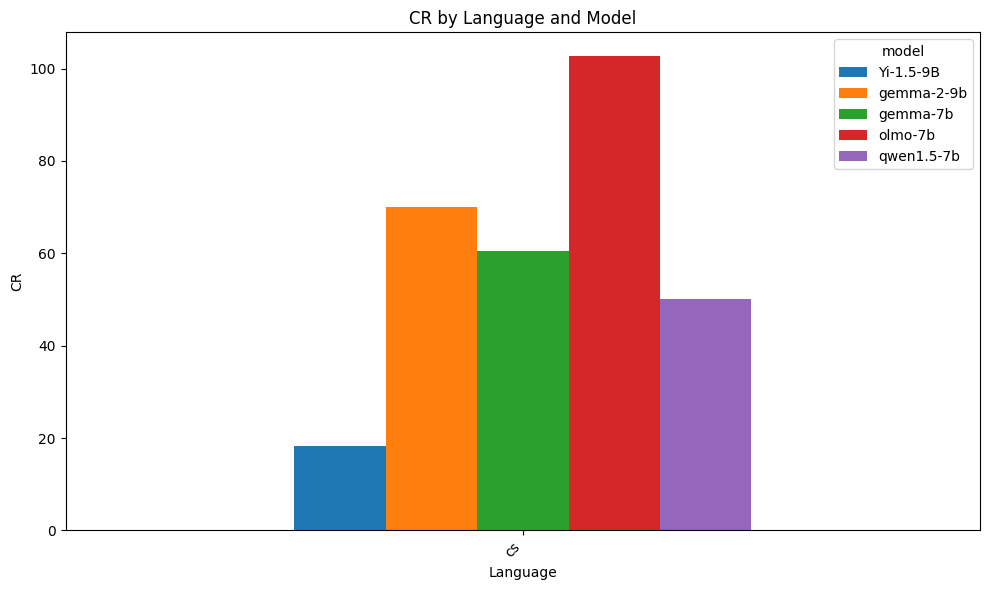

In [15]:
def plot(df):
    # Pivot the DataFrame so that language is the index and model categories form the columns
    df_pivot = df.pivot(index='language', columns='model', values='CR')

    # Plot the pivoted DataFrame as a bar chart
    df_pivot.plot(kind='bar', figsize=(10, 6))

    plt.title("CR by Language and Model")
    plt.xlabel("Language")
    plt.ylabel("CR")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot(df50)

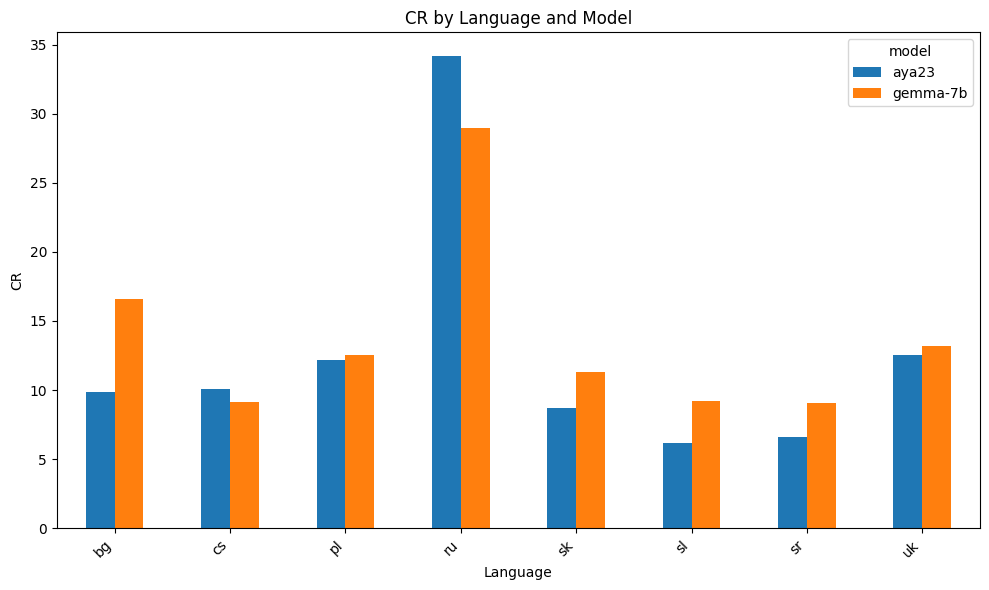

In [16]:
slavic = pd.DataFrame({"language": {}, "model": {}, "CR": {}})

for language, model in itertools.product(["sr", "uk", "bg", "ru", "pl", "sk", "sl", "cs"], ["aya23", "gemma-7b"]):
    original_path = f"genesis/{language}-50.txt"
    compressed_path = f"{model}-genesis/{language}-50.llzip"
    CR = file_size_ratio(original_path, compressed_path)


    slavic.loc[len(slavic)] = {"language": language, "model": model, "CR": CR}

plot(slavic)

Error: [Errno 2] No such file or directory: 'gemma-2b-genesis/pl-50.llzip'
Error: [Errno 2] No such file or directory: 'gemma-2b-it-genesis/pl-50.llzip'
Error: [Errno 2] No such file or directory: 'gemma-2b-genesis/sk-50.llzip'
Error: [Errno 2] No such file or directory: 'gemma-2b-it-genesis/sk-50.llzip'
Error: [Errno 2] No such file or directory: 'gemma-2b-genesis/sl-50.llzip'
Error: [Errno 2] No such file or directory: 'gemma-2b-it-genesis/sl-50.llzip'
Error: [Errno 2] No such file or directory: 'gemma-2b-genesis/cs-50.llzip'
Error: [Errno 2] No such file or directory: 'gemma-2b-it-genesis/cs-50.llzip'


/tmp/ipykernel_8009/1610825965.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  instruct.loc[len(instruct)] = {"language": language, "model": model, "CR": CR}
/tmp/ipykernel_8009/1610825965.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  instruct.loc[len(instruct)] = {"language": language, "model": model, "CR": CR}
/tmp/ipykernel_8009/1610825965.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer

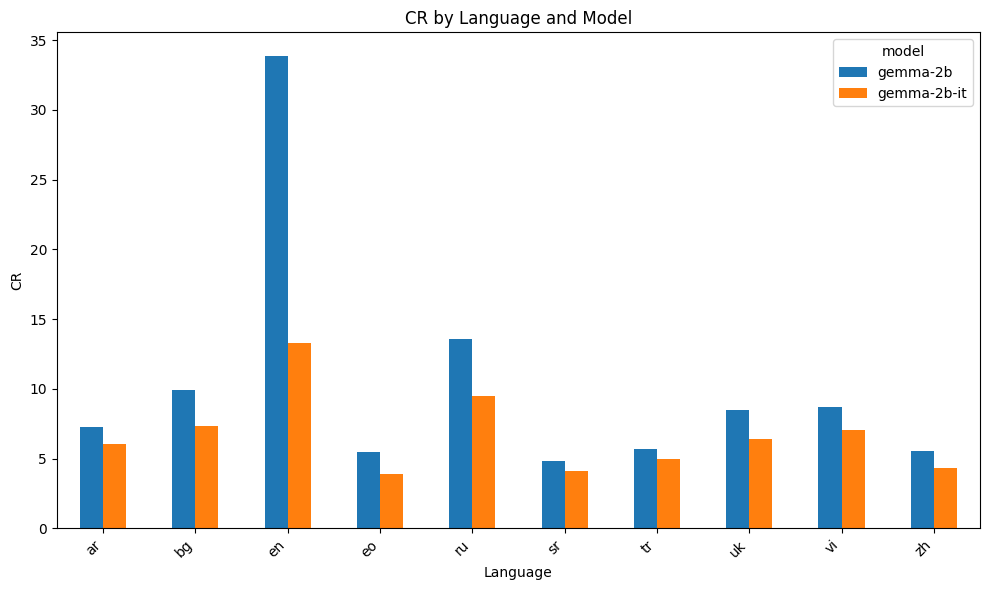

In [18]:
instruct = pd.DataFrame({"language": {}, "model": {}, "CR": {}})

for language, model in itertools.product(languages, ["gemma-2b", "gemma-2b-it"]):
    original_path = f"genesis/{language}-50.txt"
    compressed_path = f"{model}-genesis/{language}-50.llzip"
    CR = file_size_ratio(original_path, compressed_path)


    instruct.loc[len(instruct)] = {"language": language, "model": model, "CR": CR}

plot(instruct.dropna())

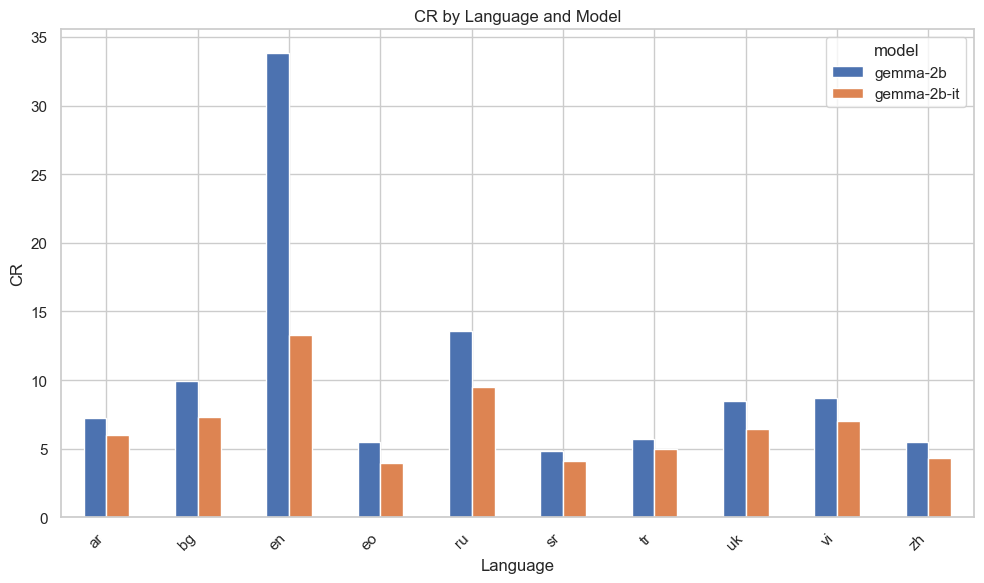

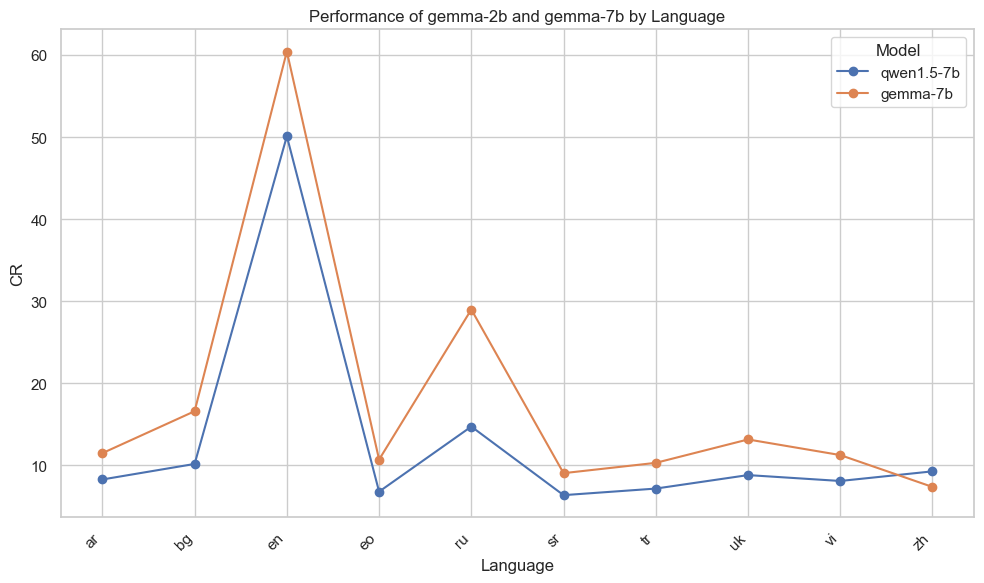

In [ ]:

df_pivot = df.pivot(index='language', columns='model', values='CR')
df_subset = df_pivot[['qwen1.5-7b', 'gemma-7b']]

fig, ax = plt.subplots(figsize=(10, 6))
df_subset.plot(kind='line', marker='o', ax=ax)

ax.set_title("Performance of gemma-2b and gemma-7b by Language")
ax.set_xlabel("Language")
ax.set_ylabel("CR")
ax.grid(True)
ax.legend(title='Model', loc='best')

# Set x-ticks and labels from the DataFrame index so all labels are shown
ax.set_xticks(range(len(df_subset.index)))
ax.set_xticklabels(df_subset.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()


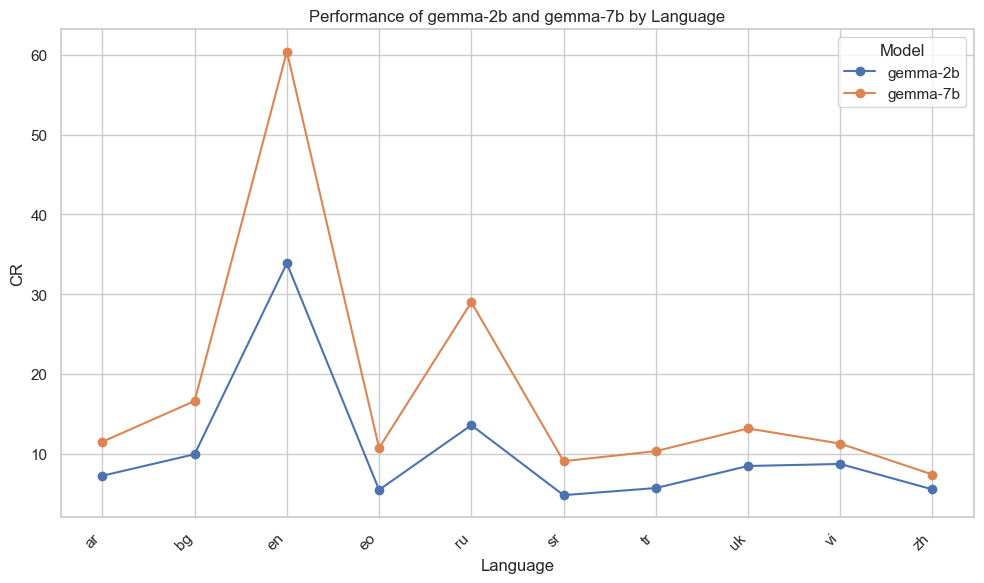

In [ ]:
df_pivot = df.pivot(index='language', columns='model', values='CR')
df_subset = df_pivot[['gemma-2b', 'gemma-7b']]

fig, ax = plt.subplots(figsize=(10, 6))
df_subset.plot(kind='line', marker='o', ax=ax)

ax.set_title("Performance of gemma-2b and gemma-7b by Language")
ax.set_xlabel("Language")
ax.set_ylabel("CR")
ax.grid(True)
ax.legend(title='Model', loc='best')

# Set x-ticks and labels from the DataFrame index so all labels are shown
ax.set_xticks(range(len(df_subset.index)))
ax.set_xticklabels(df_subset.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()


<Axes: xlabel='language'>

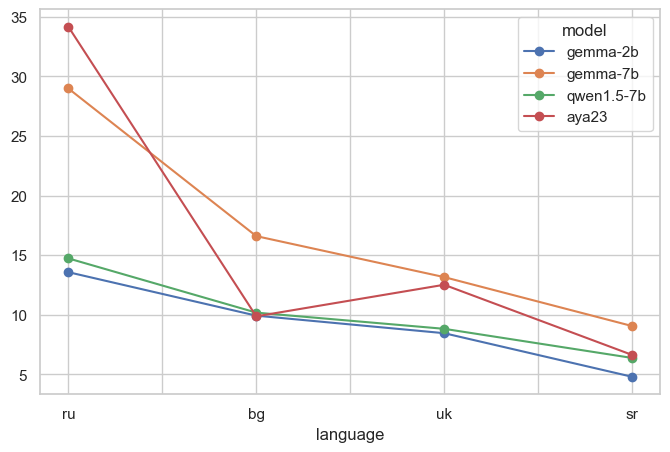

In [30]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Pivot the DataFrame so that rows are languages and columns are models
# df_pivot = df.pivot(index='language', columns='model', values='CR')

# # Filter to only include the specified subset of languages
# subset_langs = ['ru', 'bg', 'uk', 'sr']
# df_subset = df_pivot.loc[subset_langs, ['gemma-2b', 'gemma-7b', 'qwen1.5-7b', 'aya23']]

# # Plot as a grouped bar chart
# plt.figure(figsize=(10, 6))
# df_subset.plot(kind='bar', ax=plt.gca())  # Using the current Axes

# plt.title("Performance Variation of gemma-2b and gemma-7b")
# plt.xlabel("Language")
# plt.ylabel("CR")
# plt.xticks(rotation=0)  # Keep language labels horizontal
# plt.legend(title='Model', loc='best')
# plt.grid(axis='y')
# plt.tight_layout()
# plt.show()

df_subset = df_pivot.loc[['ru', 'bg', 'uk', 'sr'], ['gemma-2b', 'gemma-7b', 'qwen1.5-7b', 'aya23']]
df_subset.plot(marker='o', figsize=(8,5))
